In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [46]:
import numpy as np
import pandas as pd

In [47]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [48]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [49]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [50]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)
Base.classes.keys()

['measurement', 'station']

In [51]:
# We can view all of the classes that automap found
measurement = Base.classes.measurement
station = Base.classes.station

print(measurement)
print(station)


<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [8]:
# Save references to each table


In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [79]:
lastyear = dt.date(2016,8,23)
print(lastyear)
last12 = session.query(measurement.date, measurement.prcp, measurement.station).filter(measurement.date > lastyear)
last12_df = pd.DataFrame(last12)
last12_df.set_index('date', inplace = True)
last12_df.replace('NaN', np.nan, inplace=True)
last12_df.dropna()

last12_df.sort_values(by = 'date')


2016-08-23


,prcp,station
date,,
2016-08-24,0.08,USC00519397
2016-08-24,NaN,USC00517948
2016-08-24,2.15,USC00519281
2016-08-24,2.28,USC00514830
2016-08-24,2.15,USC00513117
...,...,...
2017-08-22,0.00,USC00519523
2017-08-23,0.08,USC00519523
2017-08-23,0.00,USC00519397


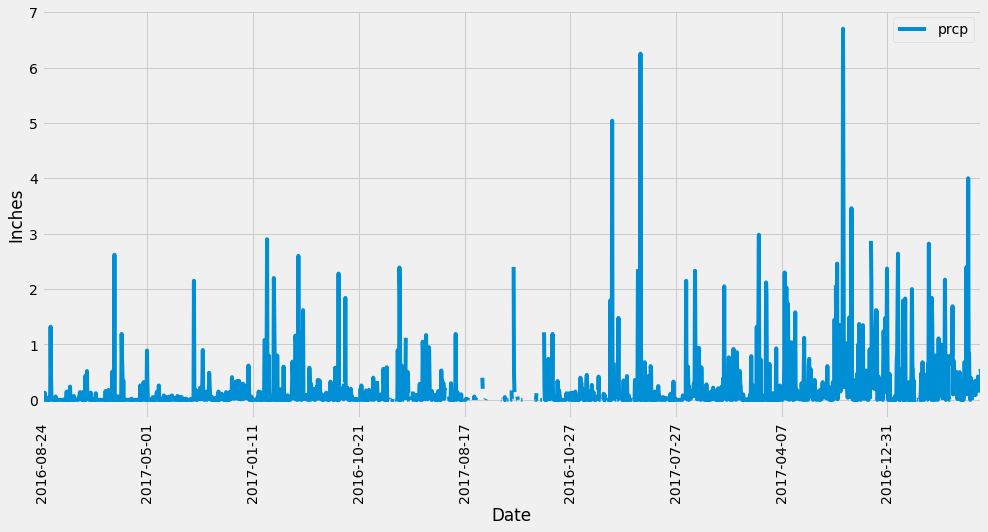

In [80]:
fig, ax = plt.subplots(figsize = (15,7))
last12_df.plot(ax = ax)
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90)
#ax.xaxis.set_major_locator(plt.MaxNLocator(12))

#plt.autoscale(enable=True, axis = 'both', tight=None)
#plt.show

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp = last12_df['prcp']
pmean = np.mean(prcp)
pmedian = np.median(prcp)
import scipy.stats as sts
pmode = sts.mode(prcp)
pvar = np.var(prcp)
pstd = np.std(prcp)
print(f"Mean = {pmean}")
print(f"Median = {pmedian}")
print(f"Mode = {pmode}")
print(f"Variance = {pvar}")
print(f"STD Dev = {pstd}")

Mean = 0.1764615384615388
Median = nan
Mode = ModeResult(mode=array([0.]), count=array([873]))
Variance = 0.21176023363237276
STD Dev = 0.4601741340322952


In [85]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.station).count()
print(f" There are {stations} stations available")

There are 9 stations available


In [140]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_data = session.query(measurement.station, station.name).filter(station.station == measurement.station)
station_count_df = pd.DataFrame(station_data)

station_count =station_count_df["name"].value_counts()
station_count_final = pd.DataFrame(station_count_df["name"].value_counts())
station_count_final
#max_station = station_count.max()
# List the stations and the counts in descending order.
#station_count_df
station_count_final.columns
#station_count_final.rename(columns = station_count_final[0] == 'Station Name', station_count_final[1] == 'Count')

Index(['name'], dtype='object')

In [142]:
station_count_final.rename(columns = {'' : 'Station Name', 'name' : 'Station Count'})

,Station Count
"WAIHEE 837.5, HI US",2772
"WAIKIKI 717.2, HI US",2724
"KANEOHE 838.1, HI US",2709
"WAIMANALO EXPERIMENTAL FARM, HI US",2669
"MANOA LYON ARBO 785.2, HI US",2612
"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
"HONOLULU OBSERVATORY 702.2, HI US",1979
"PEARL CITY, HI US",1372
"UPPER WAHIAWA 874.3, HI US",511


In [189]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_data = session.query(measurement.station, station.name, measurement.tobs).filter(station.station == measurement.station)
temp_data_df = pd.DataFrame(temp_data)
temp_data_df.rename(columns = {'station' : 'Station_ID','Name' : 'Station_Name','tobs' : 'Temperature'})
min_temp = temp_data_df['tobs'].min()
max_temp = temp_data_df['tobs'].max()
print(f'Min Temp is {min_temp}')
print(f'Max Temp is {max_temp}')
active_station = 'WAIHEE 837.5, HI US'
avg_temp_station = temp_data_df.groupby(['name']).mean()

active_station = 'WAIHEE 837.5, HI US'
#active_station_temp =  avg_temp_station[avg_temp_station.name.isin(active_station)]
avg_temp_station
print(f'The Average Temp at {active_station} is 74.553231')


Min Temp is 53.0
Max Temp is 87.0
The Average Temp at WAIHEE 837.5, HI US is 74.553231


In [193]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


active_last12 = session.query(measurement.date, measurement.station, station.name, measurement.tobs).filter(station.station == measurement.station).filter(station.name == 'WAIHEE 837.5, HI US').filter(measurement.date > lastyear)

#ast12 = session.query(measurement.date, measurement.prcp, measurement.station).filter(measurement.date > lastyear)

active_last12_df = pd.DataFrame(active_last12)
active_last12_df.set_index('date', inplace = True)
active_last12_df.replace('NaN', np.nan, inplace=True)
active_last12_df.dropna()

active_last12_df.sort_values(by = 'date')


,station,name,tobs
date,,,
2016-08-24,USC00519281,"WAIHEE 837.5, HI US",77.0
2016-08-25,USC00519281,"WAIHEE 837.5, HI US",80.0
2016-08-26,USC00519281,"WAIHEE 837.5, HI US",80.0
2016-08-27,USC00519281,"WAIHEE 837.5, HI US",75.0
2016-08-28,USC00519281,"WAIHEE 837.5, HI US",73.0
...,...,...,...
2017-08-14,USC00519281,"WAIHEE 837.5, HI US",77.0
2017-08-15,USC00519281,"WAIHEE 837.5, HI US",77.0
2017-08-16,USC00519281,"WAIHEE 837.5, HI US",76.0


Text(0.5, 0, 'Tempurature Distribution')

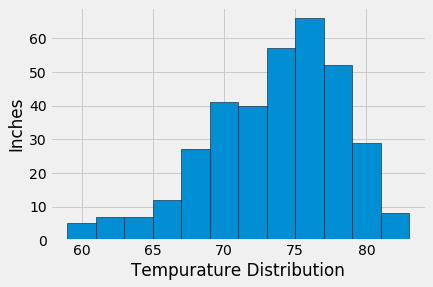

In [199]:
temp_bins = [50, 55, 60, 65, 70, 75, 80, 85, 90]

plt.hist(active_last12_df['tobs'], bins = 12, edgecolor = 'black')
plt.ylabel('Inches')
plt.xlabel('Tempurature Distribution')


## Bonus Challenge Assignment

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [23]:
# Plot the daily normals as an area plot with `stacked=False`
